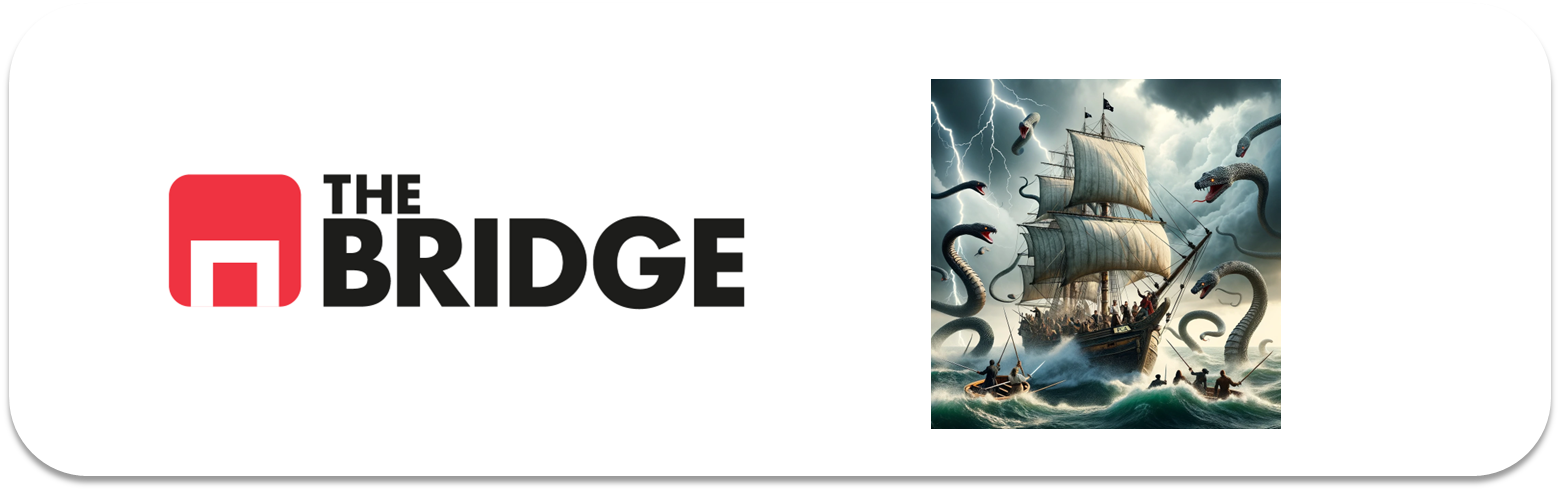

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import numpy as np

# pintar
import matplotlib.pyplot as plt
import seaborn as sns
import bootcampviztools as bt

### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificación sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. **Deshazte de las filas con nulos**, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


In [2]:
# cargar datos
data = pd.read_csv('./data/credit_npo.csv')
data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,6,0,1,0,0.0
12533,0,0.036726,62,0,0.884985,5833.0,12,0,1,0,0.0
12534,0,0.120313,49,0,0.577676,6333.0,7,0,2,0,2.0
12535,0,0.252566,63,0,0.037640,14000.0,9,0,0,0,1.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [4]:
# Eliminar filas con valores NaN
data = data.dropna()

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,11816.0,0.070244,0.255568,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,11816.0,0.335668,0.365209,0.0,0.034927,0.179183,0.587187,6.0
age,11816.0,51.447698,14.516270,21.0,41.000000,51.000000,62.000000,101.0
NumberOfTime30-59DaysPastDueNotWorse,11816.0,0.340471,2.927409,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,11816.0,0.499708,2.696067,0.0,0.143456,0.294748,0.477414,96.0
MonthlyIncome,11816.0,6864.815420,11855.905437,0.0,3498.750000,5416.000000,8300.000000,702500.0
NumberOfOpenCreditLinesAndLoans,11816.0,8.759140,5.129772,0.0,5.000000,8.000000,11.000000,49.0
NumberOfTimes90DaysLate,11816.0,0.180010,2.892577,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,11816.0,1.059580,1.140716,0.0,0.000000,1.000000,2.000000,19.0
NumberOfTime60-89DaysPastDueNotWorse,11816.0,0.149712,2.868248,0.0,0.000000,0.000000,0.000000,98.0


In [6]:
# transformar features a categoríacas
# data['NumberOfTime30-59DaysPastDueNotWorse'].value_counts(normalize=True)
data['NumberOfTime30-59DaysPastDueNotWorse'] = data['NumberOfTime30-59DaysPastDueNotWorse'].apply(lambda x: 0 if x == 0 else 1)
data['NumberOfTime30-59DaysPastDueNotWorse'].value_counts(normalize=True) # value 0 = ninguna vez; 1 = una vez o más


C:\Users\maria\AppData\Local\Temp\ipykernel_10400\1878786290.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['NumberOfTime30-59DaysPastDueNotWorse'] = data['NumberOfTime30-59DaysPastDueNotWorse'].apply(lambda x: 0 if x == 0 else 1)


NumberOfTime30-59DaysPastDueNotWorse
0    0.830907
1    0.169093
Name: proportion, dtype: float64

In [7]:
data['NumberOfTimes90DaysLate'].value_counts()
data['NumberOfTimes90DaysLate'] = data['NumberOfTimes90DaysLate'].apply(lambda x: 0 if x == 0 else 1)
data['NumberOfTimes90DaysLate'].value_counts(normalize=True) # value 0 = ninguna vez; 1 = una vez o más 

C:\Users\maria\AppData\Local\Temp\ipykernel_10400\958202482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['NumberOfTimes90DaysLate'] = data['NumberOfTimes90DaysLate'].apply(lambda x: 0 if x == 0 else 1)


NumberOfTimes90DaysLate
0    0.944144
1    0.055856
Name: proportion, dtype: float64

In [8]:
data['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()
data['NumberOfTime60-89DaysPastDueNotWorse'] = data['NumberOfTime60-89DaysPastDueNotWorse'].apply(lambda x: 0 if x == 0 else 1)
data['NumberOfTime60-89DaysPastDueNotWorse'].value_counts(normalize=True) # value 0 = ninguna vez; 1 = una vez o más 

C:\Users\maria\AppData\Local\Temp\ipykernel_10400\393775971.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['NumberOfTime60-89DaysPastDueNotWorse'] = data['NumberOfTime60-89DaysPastDueNotWorse'].apply(lambda x: 0 if x == 0 else 1)


NumberOfTime60-89DaysPastDueNotWorse
0    0.948375
1    0.051625
Name: proportion, dtype: float64

In [10]:
target = 'SeriousDlqin2yrs'

In [12]:
features_num = [col for col in data.columns if data[col].nunique() > 2]
features_num

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberRealEstateLoansOrLines',
 'NumberOfDependents']

array([[<Axes: title={'center': 'RevolvingUtilizationOfUnsecuredLines'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'DebtRatio'}>],
       [<Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'NumberOfOpenCreditLinesAndLoans'}>,
        <Axes: title={'center': 'NumberRealEstateLoansOrLines'}>],
       [<Axes: title={'center': 'NumberOfDependents'}>, <Axes: >,
        <Axes: >]], dtype=object)

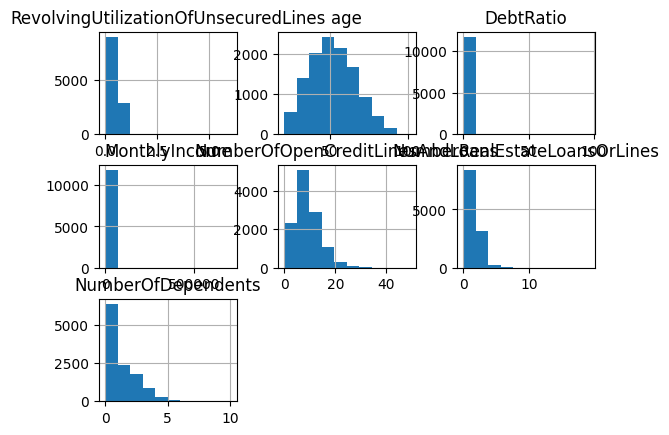

In [13]:
data[features_num].hist()

In [14]:
features_cat = [col for col in data.columns if data[col].nunique() == 2 and col not in target]
features_cat

['NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse']

In [15]:
# Dividir train-set
from sklearn.model_selection import train_test_split
train,test = train_test_split(data, test_size=0.2, random_state=42)
train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
11145,0,0.391240,68,0,2.693124,2166.0,13,0,2,0,0.0
2012,0,0.906540,59,0,0.325227,6496.0,7,0,0,0,1.0
5428,0,0.933223,52,1,0.372442,8258.0,3,0,1,0,3.0
12130,0,0.857859,50,0,0.511098,5225.0,9,0,1,0,0.0
36,0,0.000000,61,0,0.414167,5166.0,5,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
11966,0,0.397822,53,0,0.332584,11560.0,14,0,2,0,0.0
5512,0,0.015171,76,0,0.005427,3500.0,4,0,0,0,0.0
5719,0,0.988201,62,0,0.450432,8442.0,4,0,1,0,0.0
922,0,0.122072,41,0,0.638133,3749.0,9,0,1,0,1.0


In [16]:
# transformación features num
train[features_num] = train[features_num].apply(lambda x: np.log1p(x))
test[features_num] = test[features_num].apply(lambda x: np.log1p(x))

In [17]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,9452.0,0.070144,0.255403,0.000000,0.000000,0.000000,0.000000,1.000000
RevolvingUtilizationOfUnsecuredLines,9452.0,0.256502,0.248528,0.000000,0.034275,0.164845,0.462181,1.945910
age,9452.0,3.920471,0.289146,3.091042,3.737670,3.951244,4.143135,4.624973
NumberOfTime30-59DaysPastDueNotWorse,9452.0,0.168853,0.374642,0.000000,0.000000,0.000000,0.000000,1.000000
DebtRatio,9452.0,0.297610,0.287544,0.000000,0.136456,0.260488,0.390606,4.574711
MonthlyIncome,9452.0,8.532520,0.871230,0.000000,8.151045,8.601902,9.024131,13.462402
NumberOfOpenCreditLinesAndLoans,9452.0,2.134461,0.577657,0.000000,1.791759,2.197225,2.484907,3.912023
NumberOfTimes90DaysLate,9452.0,0.056390,0.230686,0.000000,0.000000,0.000000,0.000000,1.000000
NumberRealEstateLoansOrLines,9452.0,0.596167,0.501559,0.000000,0.000000,0.693147,1.098612,2.995732
NumberOfTime60-89DaysPastDueNotWorse,9452.0,0.052793,0.223632,0.000000,0.000000,0.000000,0.000000,1.000000


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Ajustar y transformar en el conjunto de entrenamiento
train[features_num] = scaler.fit_transform(train[features_num])

# Solo transformar en el conjunto de prueba
test[features_num] = scaler.transform(test[features_num])

# Asegurar que los resultados siguen siendo DataFrames (opcional)
train[features_num] = pd.DataFrame(train[features_num], columns=features_num, index=train.index)
test[features_num] = pd.DataFrame(test[features_num], columns=features_num, index=test.index)


In [19]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,9452.0,7.014388e-02,0.255403,0.000000,0.000000,0.000000,0.000000,1.000000
RevolvingUtilizationOfUnsecuredLines,9452.0,-2.668670e-17,1.000053,-1.032140,-0.894223,-0.368818,0.827633,6.798019
age,9452.0,-1.408005e-15,1.000053,-2.868701,-0.632245,0.106433,0.770116,2.436625
NumberOfTime30-59DaysPastDueNotWorse,9452.0,1.688532e-01,0.374642,0.000000,0.000000,0.000000,0.000000,1.000000
DebtRatio,9452.0,7.517380e-18,1.000053,-1.035062,-0.560482,-0.129107,0.323431,14.875366
MonthlyIncome,9452.0,2.292801e-16,1.000053,-9.794170,-0.437881,0.079641,0.564303,5.658833
NumberOfOpenCreditLinesAndLoans,9452.0,6.256339e-16,1.000053,-3.695226,-0.593293,0.108657,0.606699,3.077353
NumberOfTimes90DaysLate,9452.0,5.639018e-02,0.230686,0.000000,0.000000,0.000000,0.000000,1.000000
NumberRealEstateLoansOrLines,9452.0,-1.593685e-16,1.000053,-1.188690,-1.188690,0.193369,1.001821,4.784469
NumberOfTime60-89DaysPastDueNotWorse,9452.0,5.279306e-02,0.223632,0.000000,0.000000,0.000000,0.000000,1.000000


##### 1. Selección 1: visual + análsis de correlación + umbral de covarianza

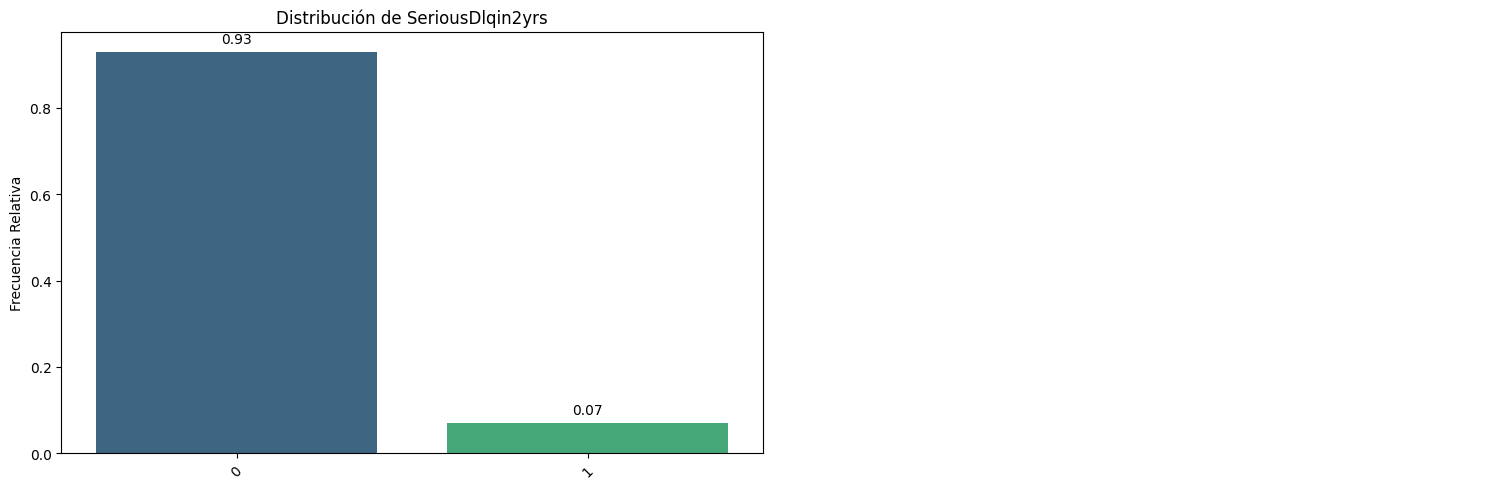

In [20]:
# Análisis visual de target
bt.pinta_distribucion_categoricas(train,[target],relativa=True,mostrar_valores=True)


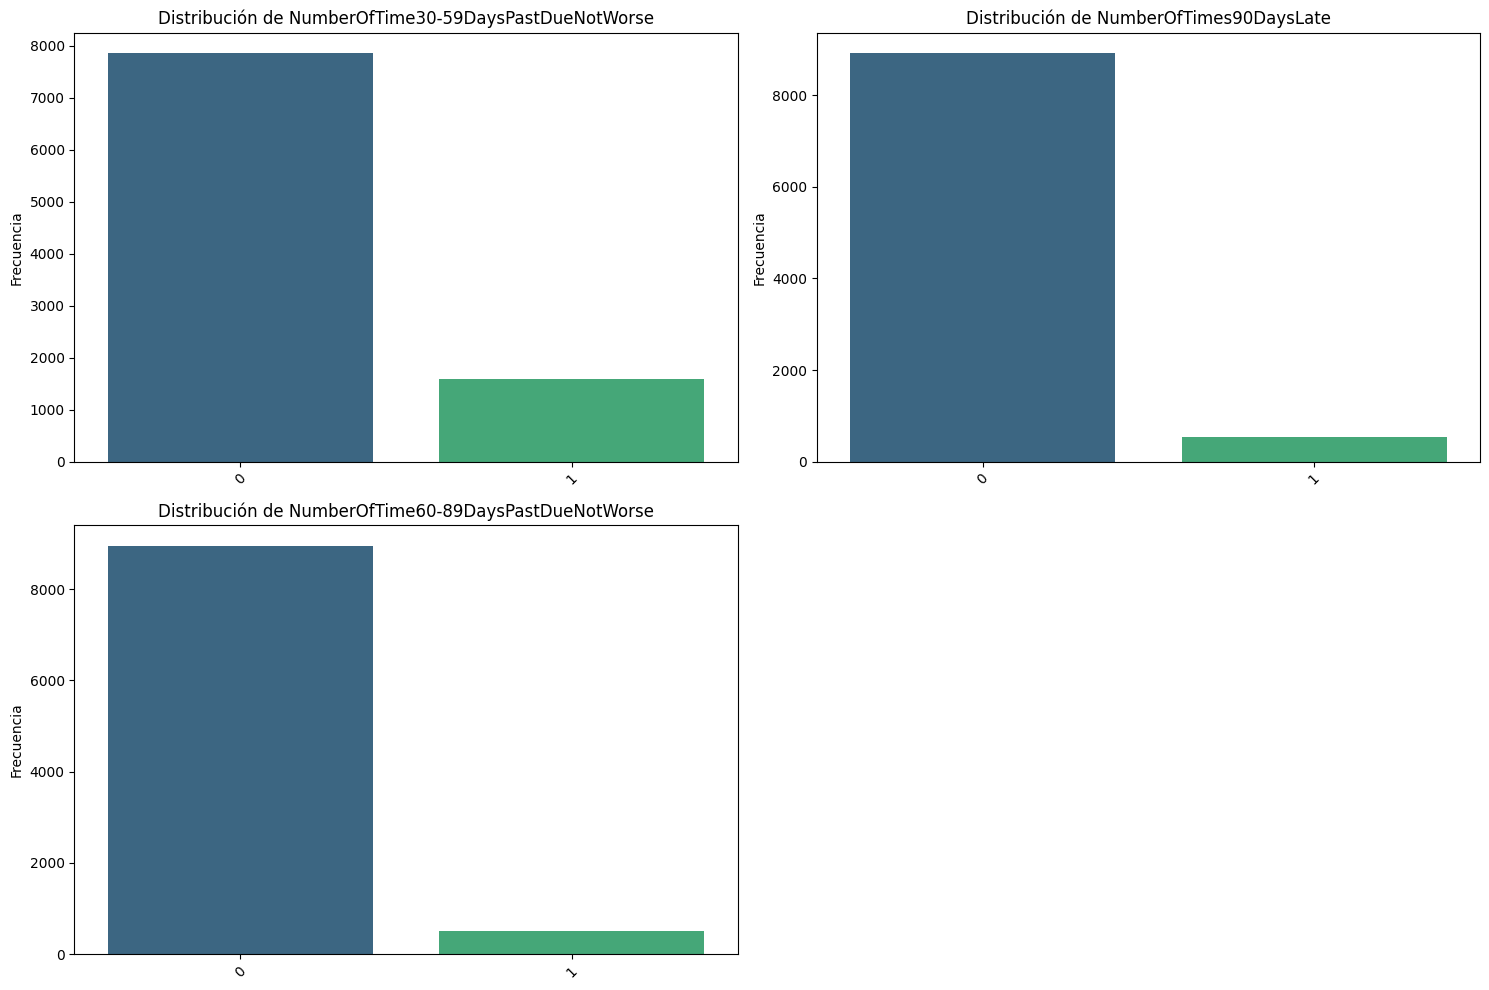

In [21]:
# Análisis visual de categóricas
bt.pinta_distribucion_categoricas(train,features_cat)

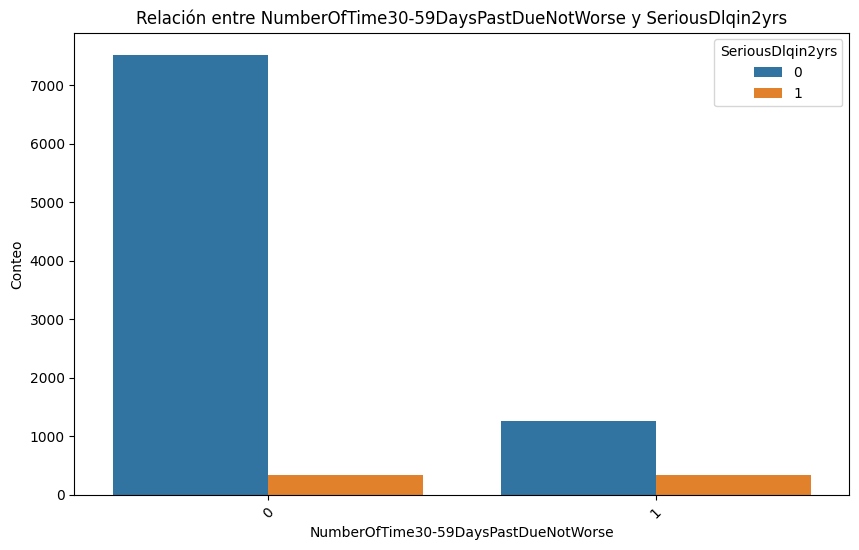

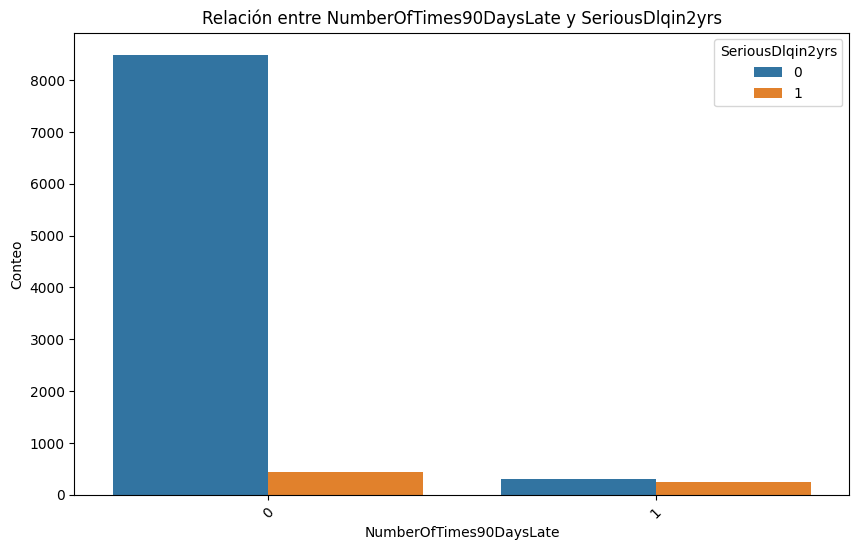

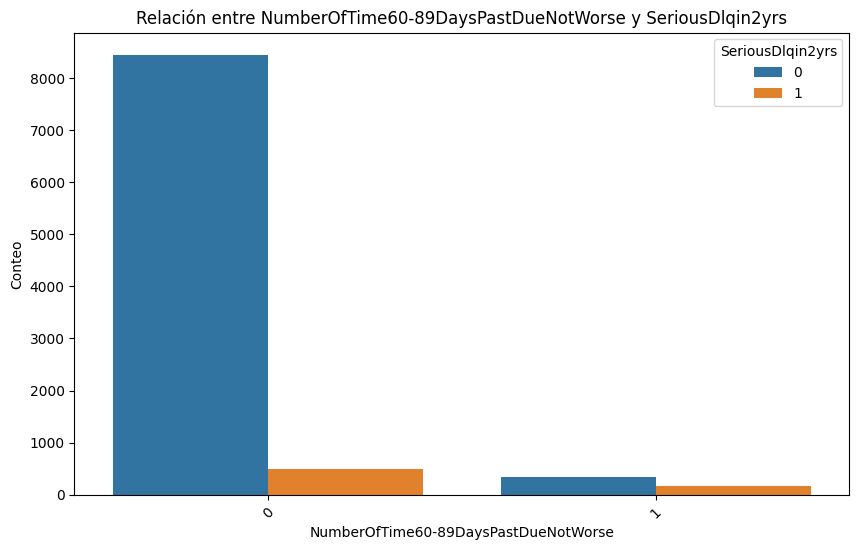

In [22]:
for feature in features_cat:
    bt.plot_categorical_relationship_fin(train, feature, target)  # Sin corchetes en `target`


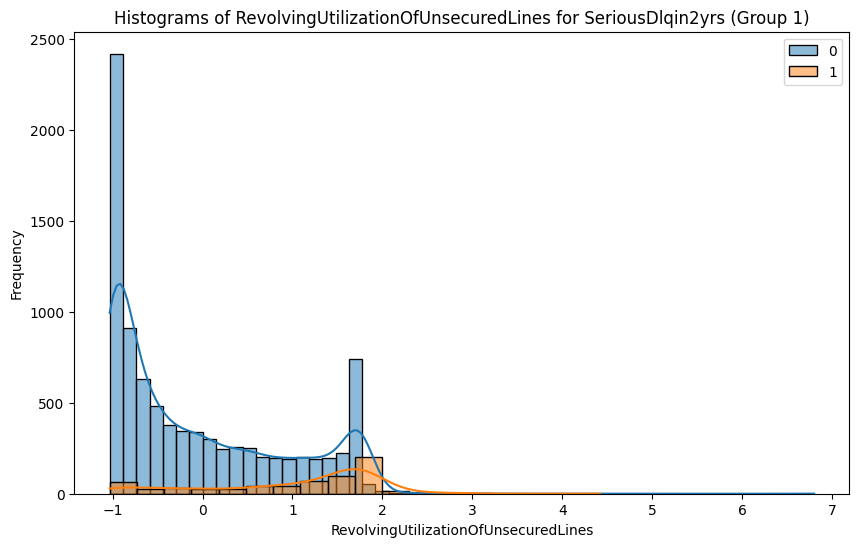

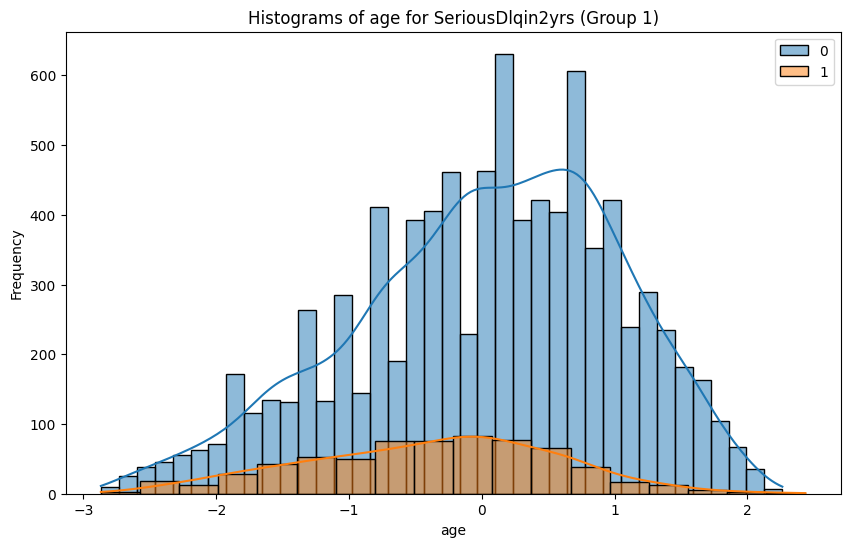

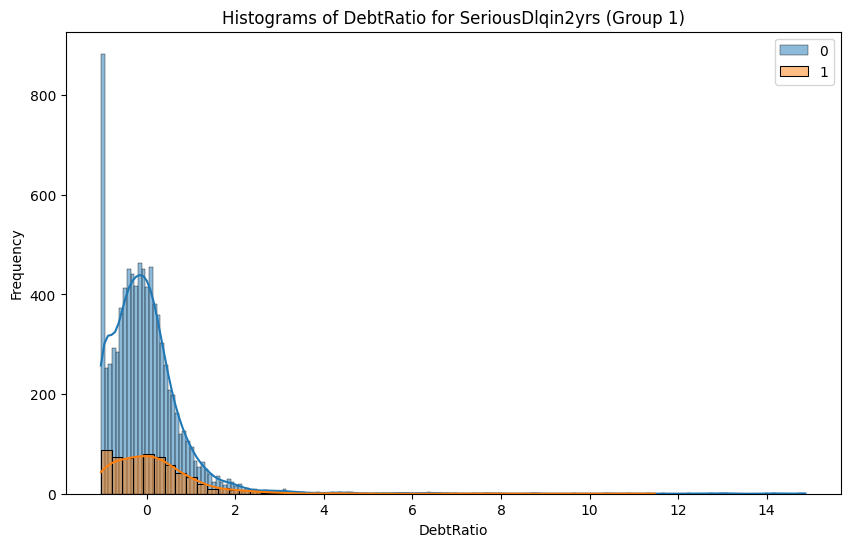

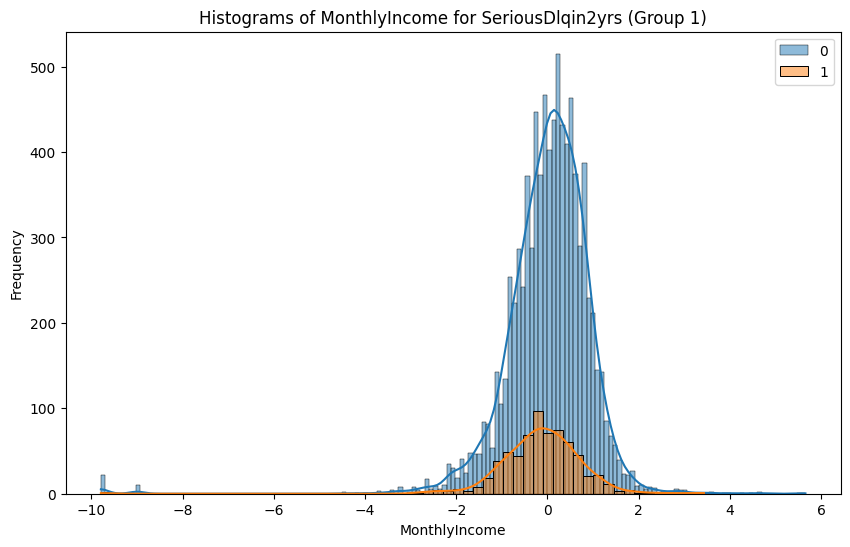

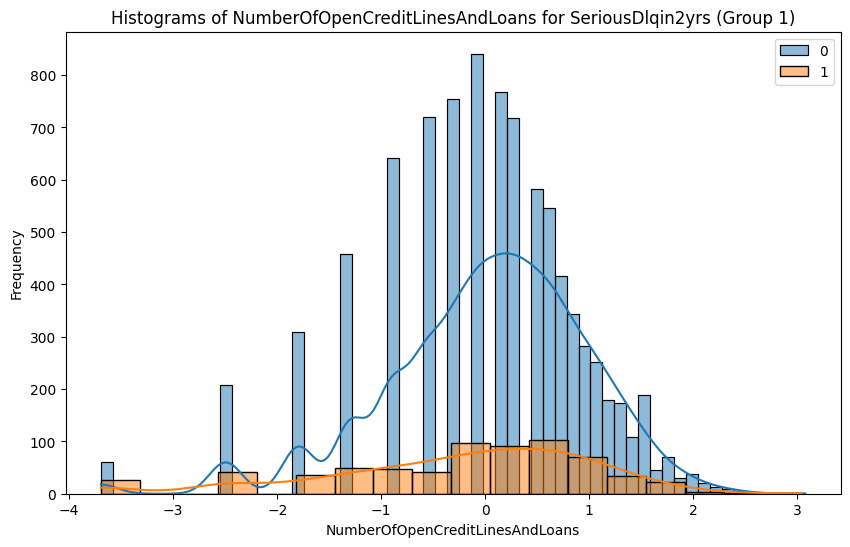

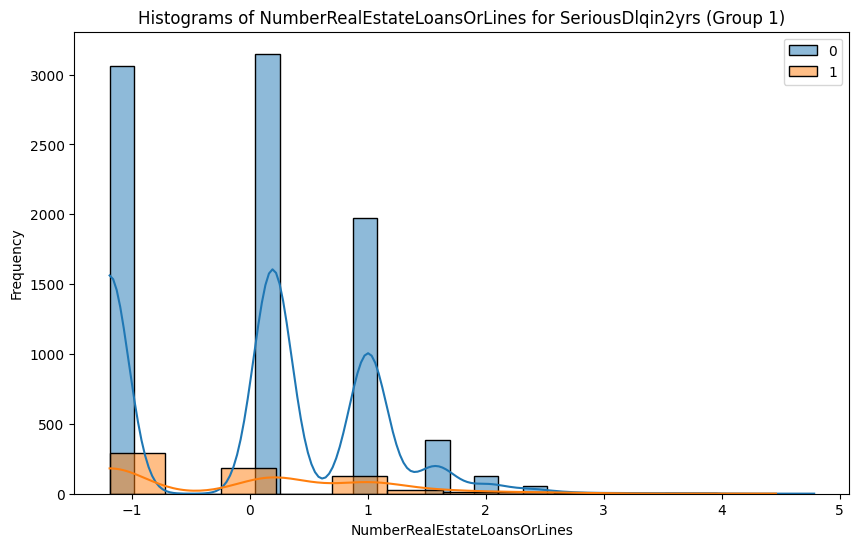

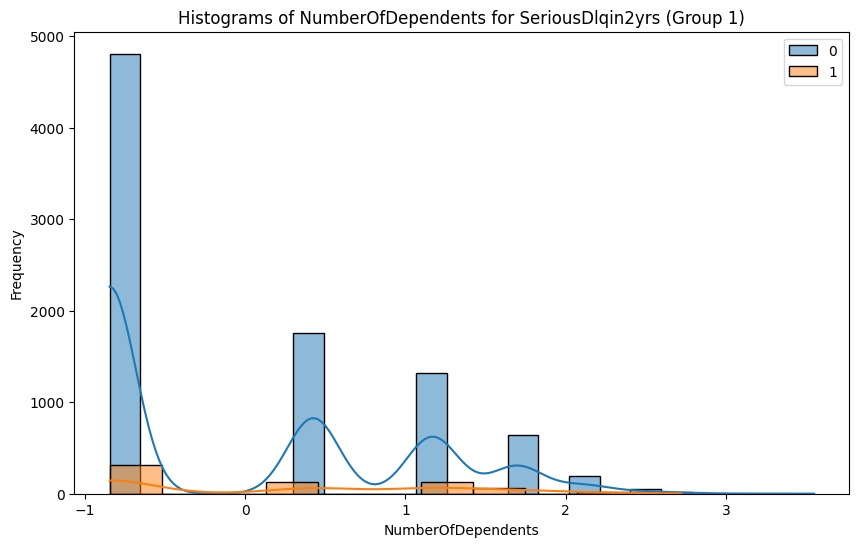

In [23]:
# Análisis visual de numéricas
for feature in features_num:
    bt.plot_grouped_histograms(train, cat_col=target, num_col=feature, group_size=train[target].nunique())

<Axes: >

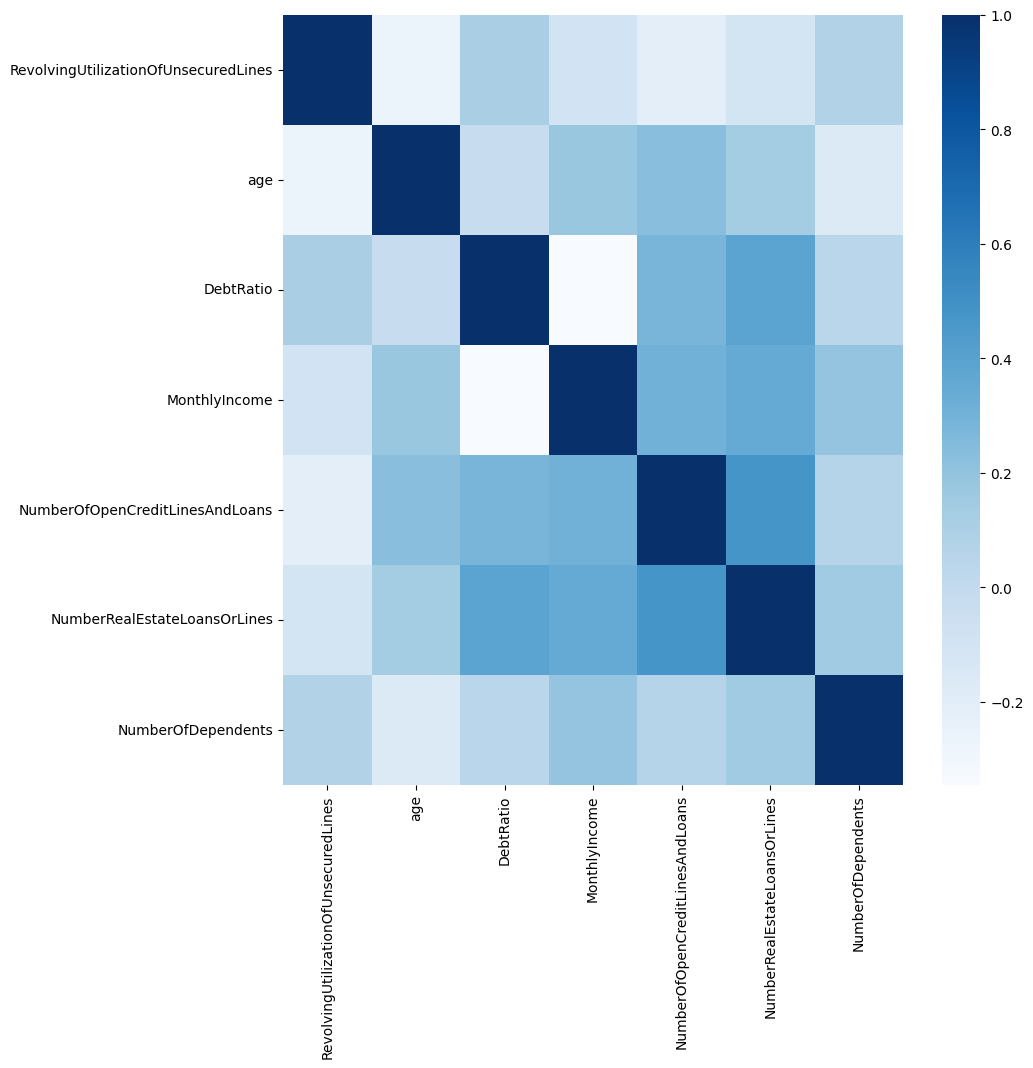

In [24]:
# Filtrado con correlación
corr= train[features_num].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr[features_num], annot= False, cmap= "Blues")

In [25]:
# Filtrado con umbral de covarianza
from sklearn.feature_selection import VarianceThreshold
umbral_varianza = 0.5
var_selector = VarianceThreshold(umbral_varianza)
var_selector.fit(train)
print("Lista seleccionada para selector de Varianza", var_selector.get_feature_names_out())

Lista seleccionada para selector de Varianza ['RevolvingUtilizationOfUnsecuredLines' 'age' 'DebtRatio' 'MonthlyIncome'
 'NumberOfOpenCreditLinesAndLoans' 'NumberRealEstateLoansOrLines'
 'NumberOfDependents']


In [27]:
features_num = ['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome', 
 'NumberOfDependents']

In [29]:
# variables seleccionadas
features_cat_sel1 = features_cat
features_num_sel1 = ['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'NumberOfOpenCreditLinesAndLoans']

In [30]:
features_cat_sel1

['NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse']

In [31]:
features_cat_sel1 = ['NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate']

In [32]:
features_sel1 = features_cat_sel1 + features_num_sel1

In [33]:
features_sel1

['NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'NumberOfOpenCreditLinesAndLoans']

##### 2. Selección 2: Selección con ANOVA y Mutual Information

In [34]:
X_train = train[features_cat+features_num]
y_train = train[target]

In [35]:
X_test = test[features_cat+features_num]
y_test = test[target]

In [36]:
# Selección de features num con ANOVA
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=5)
x_data_kbest = selector.fit_transform(train[features_num], y_train)
features_num_sel2 = selector.get_feature_names_out().tolist()

In [37]:
features_num_sel2

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfDependents']

In [38]:
# Selección de features cat con Mutual Information

from sklearn.metrics import mutual_info_score

for col in features_cat:
    print(f"MI({col};{target}):", mutual_info_score(data[col],data[target]))

MI(NumberOfTime30-59DaysPastDueNotWorse;SeriousDlqin2yrs): 0.02004269629438246
MI(NumberOfTimes90DaysLate;SeriousDlqin2yrs): 0.032077473517412664
MI(NumberOfTime60-89DaysPastDueNotWorse;SeriousDlqin2yrs): 0.0183483673425959


In [39]:
features_cat_sel2 = ['NumberOfTimes90DaysLate']

In [40]:
features_sel2 = features_cat_sel2 + features_num_sel2

In [41]:
features_sel2

['NumberOfTimes90DaysLate',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfDependents']

##### 3. Selección mediante modelo

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

rf_selector = RandomForestClassifier(random_state= 42)
selector_model = SelectFromModel(estimator = rf_selector, threshold= "median") # El modelo debe tener un atributo feature_importances_ o un atributo coef_

selector_model.fit(train[features_num+features_cat],train[target])

features_sel3 =selector_model.get_feature_names_out().tolist()

features_sel3


['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome']

#### 4. Selección con RFE

In [49]:
from sklearn.feature_selection import RFE

rf_RFE = RandomForestClassifier(random_state= 42)
rfe = RFE(estimator = rf_RFE, n_features_to_select= 4, # Iterará hasta quedarse con 5
                    step = 1) # Elimina de una en una, pero es configurable

rfe.fit(train[features_num+features_cat], y_train)

print(rfe.ranking_)
features_ranking = pd.DataFrame(rfe.ranking_, columns= ["ranking"], index = features_num+features_cat).sort_values("ranking")
features_ranking

[1 1 1 1 3 4 2 5]


,ranking
RevolvingUtilizationOfUnsecuredLines,1
age,1
DebtRatio,1
MonthlyIncome,1
NumberOfTimes90DaysLate,2
NumberOfDependents,3
NumberOfTime30-59DaysPastDueNotWorse,4
NumberOfTime60-89DaysPastDueNotWorse,5


In [50]:
features_ranking['ranking'] == 1
features_sel4 = features_ranking.loc[features_ranking['ranking'] == 1].index.tolist()
features_sel4

['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome']

In [44]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
import pandas as pd

# Definir el modelo SVM con penalización L1 (para selección de features)
svm_model = LinearSVC(random_state=42, penalty='l1', dual=False)  # l1 ayuda a la selección de características

# Configurar RFE con SVM
rfe = RFE(estimator=svm_model, n_features_to_select=4, step=1)  # Mantendrá 4 características

# Ajustar RFE al conjunto de entrenamiento
rfe.fit(train[features_num + features_cat], y_train)

# Mostrar rankings de features
features_ranking = pd.DataFrame(rfe.ranking_, columns=["ranking"], index=features_num + features_cat).sort_values("ranking")

features_ranking


,ranking
RevolvingUtilizationOfUnsecuredLines,1
NumberOfTime30-59DaysPastDueNotWorse,1
NumberOfTimes90DaysLate,1
NumberOfTime60-89DaysPastDueNotWorse,1
age,2
DebtRatio,3
MonthlyIncome,4
NumberOfDependents,5


In [45]:
features_ranking['ranking'] == 1
features_sel5 = features_ranking.loc[features_ranking['ranking'] == 1].index.tolist()
features_sel5

['RevolvingUtilizationOfUnsecuredLines',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse']

#### 5. Selección con SFS

In [46]:
from sklearn.feature_selection import SequentialFeatureSelector
rf_SFS = RandomForestClassifier(random_state = 42)
sfs_forward = SequentialFeatureSelector(rf_SFS, n_features_to_select = 4,cv = 4,scoring = "balanced_accuracy")
sfs_forward.fit(train[features_num+features_cat], y_train)

print("Elegidasd SFS:", sfs_forward.get_feature_names_out())

features_sel6 = sfs_forward.get_feature_names_out()

Elegidasd SFS: ['RevolvingUtilizationOfUnsecuredLines' 'NumberOfDependents'
 'NumberOfTimes90DaysLate' 'NumberOfTime60-89DaysPastDueNotWorse']


In [47]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5) 
sfs_forward = SequentialFeatureSelector(knn_model, 
                                        n_features_to_select=4, 
                                        direction="forward", 
                                        cv=4, 
                                        scoring="balanced_accuracy")

sfs_forward.fit(train[features_num + features_cat], y_train)

print("Elegidas por SFS con KNN:", sfs_forward.get_feature_names_out())

# Guardar las features seleccionadas
features_sel7 = list(sfs_forward.get_feature_names_out())


Elegidas por SFS con KNN: ['RevolvingUtilizationOfUnsecuredLines'
 'NumberOfTime30-59DaysPastDueNotWorse' 'NumberOfTimes90DaysLate'
 'NumberOfTime60-89DaysPastDueNotWorse']


#### 6. Seleccion final con hard-voting

In [67]:
from collections import Counter

# Listas de features seleccionadas
features_lists = [features_sel1, features_sel2, features_sel3, features_sel4, features_sel5, features_sel6, features_sel7]

# Contar la frecuencia de cada feature en todas las listas
feature_counts = Counter(feature for sublist in features_lists for feature in sublist)

# Definir el umbral mínimo de votos (Ejemplo: seleccionadas en al menos 3 listas)
min_votes = 4

# Seleccionar las features que aparecen al menos `min_votes` veces
features_sel8 = [feature for feature, count in feature_counts.items() if count >= min_votes]

# Mostrar el resultado
print(f"Features seleccionadas con al menos {min_votes} votos: {features_sel8}")


Features seleccionadas con al menos 4 votos: ['NumberOfTimes90DaysLate', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio']


In [60]:
features_sel8

['NumberOfTimes90DaysLate',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio']

#### 7. Validación cruzada con los modelos y listados de variables

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Definir modelos de clasificación. Mejor seleccionar modelos que permiten balancear
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "LogisticRegression": LogisticRegression(max_iter=1000)
}

# Definir diccionario con las listas de features
feature_sets = {
    "features_sel1": ['NumberOfTimes90DaysLate', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio'],
    "features_sel2": ['NumberOfTimes90DaysLate',  'RevolvingUtilizationOfUnsecuredLines',  'age',  'DebtRatio',  'MonthlyIncome',
                        'NumberOfDependents'],
    "features_sel3": ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome'],
    "features_sel4": ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome'],
    "features_sel5": ['RevolvingUtilizationOfUnsecuredLines',  'NumberOfTime30-59DaysPastDueNotWorse',  'NumberOfTimes90DaysLate',  'NumberOfTime60-89DaysPastDueNotWorse'],
    "features_sel6": ['RevolvingUtilizationOfUnsecuredLines', 'NumberOfDependents','NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse'],
    "features_sel7": ['RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse'],
    "features_sel8": ['NumberOfTimes90DaysLate',  'RevolvingUtilizationOfUnsecuredLines',  'age',  'DebtRatio']
}

# Evaluación de modelos
results = []

for model_name, model in models.items():
    for feature_set_name, features in feature_sets.items():
        # Validación cruzada con métrica de Recall
        recall_scores = cross_val_score(model, train[features], y_train, 
                                        cv=5, scoring="balanced_accuracy")
        
        # Guardar resultados
        results.append({
            "Model": model_name,
            "Feature_Set": feature_set_name,
            "balanced_accuracy": np.mean(recall_scores)
        })

# Convertir resultados a un DataFrame
results_df = pd.DataFrame(results)

# Ordenar por mejor recall
best_result = results_df.sort_values(by="balanced_accuracy", ascending=False).iloc[0]

print(f"\n🔹 **Mejor Modelo:** {best_result['Model']}")
print(f"🔹 **Mejor Set de Features:** {best_result['Feature_Set']}")
print(f"🔹 **Balanced accuracy:** {best_result['balanced_accuracy']:.4f}")



🔹 **Mejor Modelo:** LogisticRegression
🔹 **Mejor Set de Features:** features_sel2
🔹 **Balanced accuracy:** 0.5957


##### 7. Optimización de hiperparámetros

In [64]:
from sklearn.model_selection import GridSearchCV

# Definir el modelo base
log_reg = LogisticRegression(max_iter=5000)  # Aumentamos max_iter para garantizar la convergencia

# Definir la grilla de hiperparámetros a probar
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['saga'],  # Compatible con l1, l2 y elasticnet
    'l1_ratio': [0.1, 0.5, 0.9]  # Necesario si se usa elasticnet
}


# Configurar el GridSearch con validación cruzada
log_reg_grid = GridSearchCV(
    log_reg, param_grid,
    scoring='balanced_accuracy',
    cv=5,  # 5-fold Cross Validation
    n_jobs=-1,  # Usa todos los núcleos disponibles
    verbose=1  # Muestra el progreso
)

# Entrenar el GridSearch con las features seleccionadas
log_reg_grid.fit(train[features_sel5], y_train)

# Mostrar los mejores hiperparámetros
print(f"🔹 Mejor combinación de hiperparámetros: {log_reg_grid.best_params_}")
print(f"🔹 Mejor balanced accuracy obtenida: {log_reg_grid.best_score_:.4f}")


Fitting 5 folds for each of 54 candidates, totalling 270 fits
🔹 Mejor combinación de hiperparámetros: {'C': 100, 'l1_ratio': 0.1, 'penalty': 'l1', 'solver': 'saga'}
🔹 Mejor balanced accuracy obtenida: 0.5909


c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


In [269]:
from sklearn.model_selection import GridSearchCV

# Definir el modelo base
knn = KNeighborsClassifier()

# Definir la grilla de hiperparámetros a probar
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Número de vecinos
    'weights': ['uniform', 'distance'],  # Cómo se ponderan los vecinos
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Tipo de distancia
}

# Configurar el GridSearch con validación cruzada
knn_grid = GridSearchCV(knn, param_grid, 
                           scoring='balanced_accuracy', 
                           cv=5,  # 5-fold Cross Validation
                           n_jobs=-1,  # Usa todos los núcleos disponibles
                           verbose=1)  # Muestra el progreso

# Entrenar el GridSearch con las features seleccionadas
knn_grid.fit(train[features_sel5], y_train)

# Mostrar los mejores hiperparámetros
print(f"🔹 Mejor combinación de hiperparámetros: {knn_grid.best_params_}")
print(f"🔹 Mejor balanced accuracy obtenida: {knn_grid.best_score_:.4f}")


Fitting 5 folds for each of 30 candidates, totalling 150 fits
🔹 Mejor combinación de hiperparámetros: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
🔹 Mejor balanced accuracy obtenida: 0.6211


#### 8. Evaluación contra el test


In [65]:
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix

# Obtener el mejor modelo entrenado en GridSearchCV
best_log_reg = log_reg_grid.best_estimator_

# Hacer predicciones en el conjunto de test
y_pred = best_log_reg.predict(test[features_sel5])

# Evaluar el modelo
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"🔹 Balanced Accuracy en Test: {balanced_acc:.4f}")

# Reporte de clasificación completo
print("\n📊 Clasificación Report:")
print(classification_report(y_test, y_pred))

# Matriz de Confusión
print("\n🔹 Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))


🔹 Balanced Accuracy en Test: 0.5662

📊 Clasificación Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2197
           1       0.49      0.14      0.22       167

    accuracy                           0.93      2364
   macro avg       0.71      0.57      0.59      2364
weighted avg       0.91      0.93      0.91      2364


🔹 Matriz de Confusión:
[[2172   25]
 [ 143   24]]


In [270]:
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix

# Obtener el mejor modelo entrenado en GridSearchCV
best_knn = knn_grid.best_estimator_

# Hacer predicciones en el conjunto de test
y_pred = best_knn.predict(test[features_sel5])

# Evaluar el modelo
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"🔹 Balanced Accuracy en Test: {balanced_acc:.4f}")

# Reporte de clasificación completo
print("\n📊 Clasificación Report:")
print(classification_report(y_test, y_pred))

# Matriz de Confusión
print("\n🔹 Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))


🔹 Balanced Accuracy en Test: 0.6369

📊 Clasificación Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2345
           1       0.33      0.32      0.32       163

    accuracy                           0.91      2508
   macro avg       0.64      0.64      0.64      2508
weighted avg       0.91      0.91      0.91      2508


🔹 Matriz de Confusión:
[[2239  106]
 [ 111   52]]


In [272]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE para balancear las clases antes de entrenar KNN
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(train[features_sel5], y_train)

# Reentrenar KNN con datos balanceados
best_knn.fit(X_resampled, y_resampled)

# Evaluar en test
y_pred_smote = best_knn.predict(test[features_sel5])
print("Reporte de clasificación con SMOTE:")
print(classification_report(y_test, y_pred_smote))


Reporte de clasificación con SMOTE:
              precision    recall  f1-score   support

           0       0.96      0.79      0.86      2345
           1       0.15      0.53      0.23       163

    accuracy                           0.77      2508
   macro avg       0.55      0.66      0.55      2508
weighted avg       0.91      0.77      0.82      2508



### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.